In [1]:
import numpy as np

In [2]:
!pip install pandas

In [3]:
import pandas as pd

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
df = pd.read_csv('Cleaned Car.csv')

In [5]:
df.head() 

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [6]:
df.isnull().sum()

Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [8]:
le = LabelEncoder()

In [9]:
# df['transmission'] = le.fit_transform(df['transmission'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])

In [10]:
df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,2
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,0
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,2
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,0
4,4,Ford Figo,Ford,2012,175000,41000,0


company
Maruti        221
Hyundai       139
Mahindra       97
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

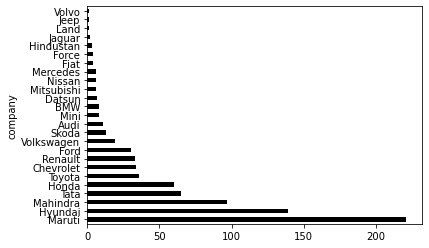

In [11]:
df['company'].value_counts().plot(kind='barh', color = 'black')
df['company'].value_counts()

In [12]:
df['company'] = le.fit_transform(df['company'])

In [13]:
df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,9,2007,80000,45000,2
1,1,Mahindra Jeep CL550,13,2006,425000,40,0
2,2,Hyundai Grand i10,9,2014,325000,28000,2
3,3,Ford EcoSport Titanium,6,2014,575000,36000,0
4,4,Ford Figo,6,2012,175000,41000,0


In [16]:
df = df.drop(['name'], axis=1)

In [17]:
df.head()

,Unnamed: 0,company,year,Price,kms_driven,fuel_type
0,0,9,2007,80000,45000,2
1,1,13,2006,425000,40,0
2,2,9,2014,325000,28000,2
3,3,6,2014,575000,36000,0
4,4,6,2012,175000,41000,0


In [18]:
df.columns

Index(['Unnamed: 0', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [19]:
df = df.drop(['Unnamed: 0'], axis=1)

In [20]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,9,2007,80000,45000,2
1,13,2006,425000,40,0
2,9,2014,325000,28000,2
3,6,2014,575000,36000,0
4,6,2012,175000,41000,0


In [21]:
df.columns

Index(['company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [22]:
X = df[['company', 'year', 'kms_driven', 'fuel_type']]

In [23]:
Y = df[['Price']]

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
pred = model.predict(X_test)

In [29]:
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
score = r2_score(Y_test,pred)

In [31]:
score

0.10675982063324096

In [32]:
mse = mean_squared_error(Y_test,pred)

In [33]:
mse

187083395423.4669

# Descision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtr = DecisionTreeRegressor()

In [36]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [37]:
pred2 = dtr.predict(X_test)

In [38]:
score2 = r2_score(Y_test,pred2)

In [39]:
score2

0.48693024203035185

In [40]:
mse2 = mean_squared_error(Y_test,pred2)

In [41]:
mse2

107459152227.23824

# Random Forest 

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor()

In [44]:
rfr.fit(X_train,Y_train)

<ipython-input-44-2232b6e55c10>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,Y_train)


RandomForestRegressor()

In [45]:
pred3 = rfr.predict(X_test)

In [46]:
score3 = r2_score(Y_test,pred3)

In [47]:
score3

0.516207944701734

In [48]:
mse3 = mean_squared_error(Y_test,pred3)

In [50]:
mse3

101327126202.78874

# XGB(eXtreme Boost)

In [51]:
!pip install xgboost

In [52]:
from xgboost import XGBRegressor

In [53]:
xgbr = XGBRegressor()

In [54]:
xgbr.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
pred4 = xgbr.predict(X_test)

In [56]:
score4 = r2_score(Y_test,pred4)

In [57]:
score4

0.4893884619856148

In [58]:
mse4 = mean_squared_error(Y_test,pred4)

In [59]:
mse4

106944293909.67537

In [62]:
tab = pd.DataFrame({'ML Models':['Linear Regressor','Decision Tree','Random Forest','XGB'],
                   'R2 Score':[score,score2,score3,score4],
                   "Mean Squared Error":[mse,mse2,mse3,mse4]})

In [63]:
tab

,ML Models,R2 Score,Mean Squared Error
0,Linear Regressor,0.106760,1.870834e+11
1,Decision Tree,0.486930,1.074592e+11
2,Random Forest,0.516208,1.013271e+11
3,XGB,0.489388,1.069443e+11


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ML Models', ylabel='R2 Score'>

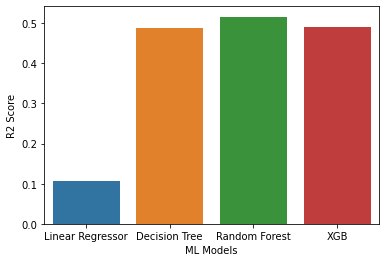

In [64]:
sns.barplot(tab['ML Models'],tab['R2 Score'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ML Models', ylabel='Mean Squared Error'>

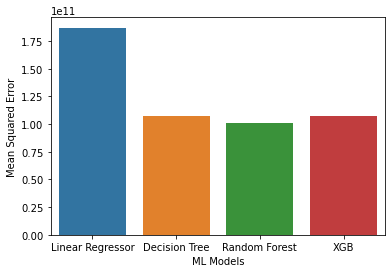

In [65]:
sns.barplot(tab['ML Models'],tab['Mean Squared Error'])

# Best Model ==> Random Forest